In [12]:
import matplotlib.pyplot as plt
import numpy as np
from importrhdutilities import load_file

Reading /mnt/project0/MultiRegion/data/raw/MultiRegion/M9_7/240402/M9_7_240402_181149/M9_7_240402_182149.rhd
Found 80 amplifier channels.
Found 9 auxiliary input channels.
File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
No missing timestamps in data.



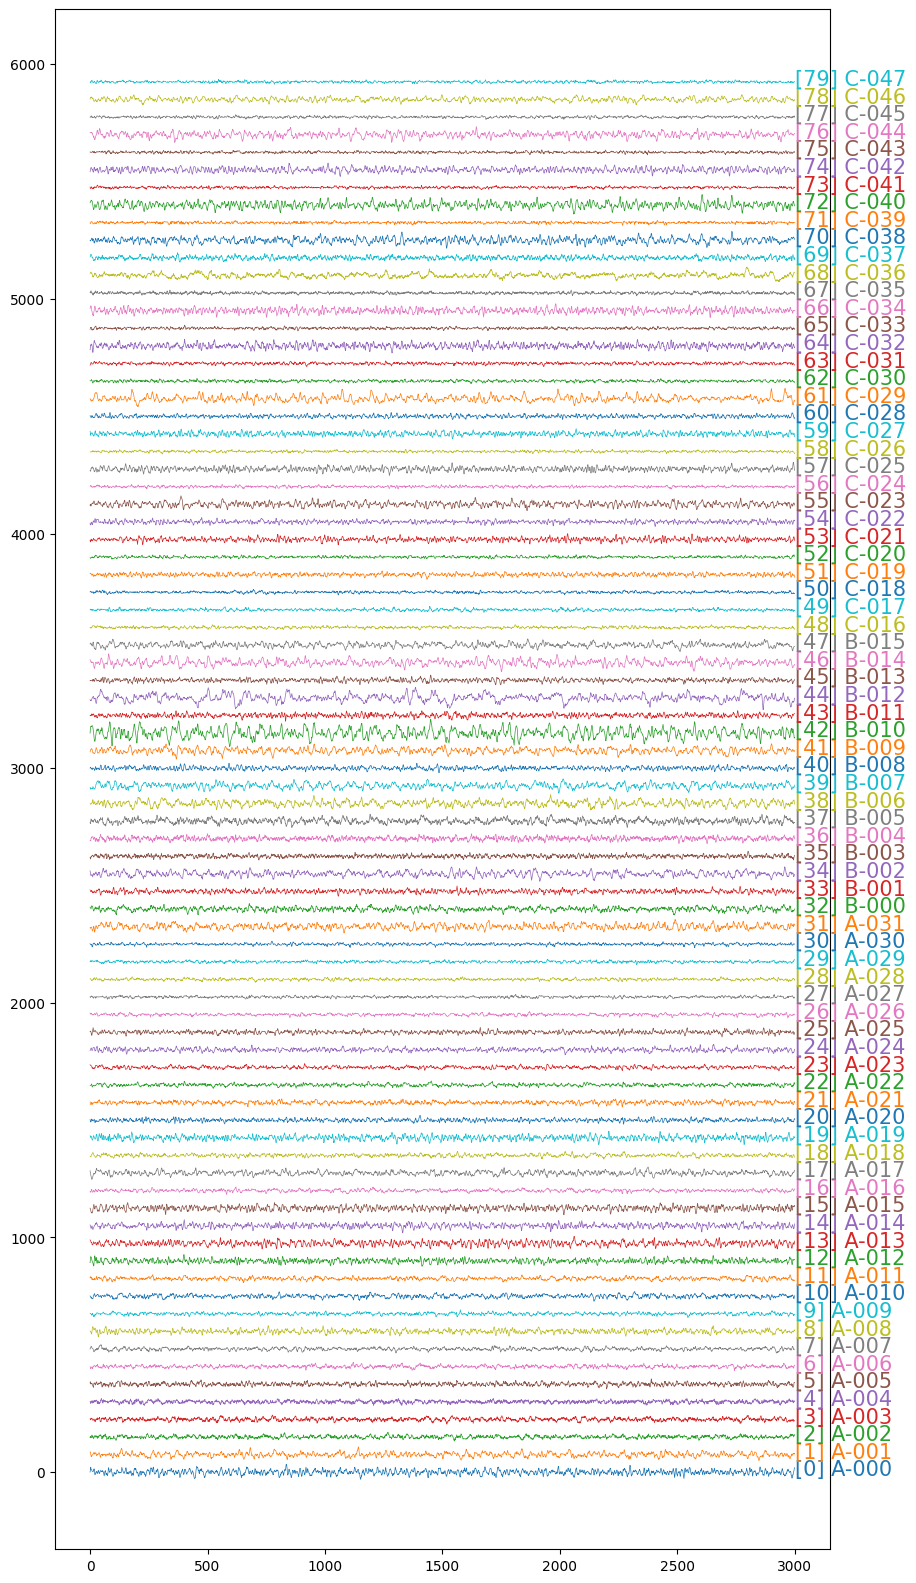

In [35]:
path = '/mnt/project0/MultiRegion/data/raw/MultiRegion/M9_7/240402/M9_7_240402_181149/M9_7_240402_182149.rhd'

trace_gap = 75
fontsize = 15

raw_data, data_present = load_file(path)
traces = raw_data['amplifier_data']
sampling_frequency = raw_data['frequency_parameters']['amplifier_sample_rate']
channel_names = [channel_info['native_channel_name'] for channel_info in raw_data['amplifier_channels']]

t_start_s = 0 
t_end_s = 0.1

# plotted_channels = np.arange(traces.shape[0])
plotted_channels = np.arange(traces.shape[0])
# plotted_channels = [42, 44]

plotted_traces = traces[plotted_channels, int(t_start_s * sampling_frequency): int(t_end_s * sampling_frequency)]

plt.figure(figsize=(10, 20)) # width, height
for trace_index, trace in enumerate(plotted_traces):
    color = plt.cm.tab10(trace_index % 10)
    plt.plot(trace + trace_index * trace_gap, linewidth=0.5, color=color)
    plt.text(len(trace), trace_index * trace_gap - fontsize, f'[{plotted_channels[trace_index]}] {channel_names[plotted_channels[trace_index]]}', fontsize=fontsize, color=color)
plt.show()
plt.close()